In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# membaca file csv menggunakan pandas
df = pd.read_csv('../data/Iris.csv')
#cetak header data (5 baris data) dari file 
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## EDA

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Modelling

### Feature selection

In [7]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# target
y = df['Species']

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

### Splitting data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Buat model

In [10]:
# membuat model SVM dengan kernel linear
model = SVC(kernel='linear')

model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Eval model

In [11]:
y_pred = model.predict(X_test)
# akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
# laporan klasifikasi
print("\nLaporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### Visualisasi data


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


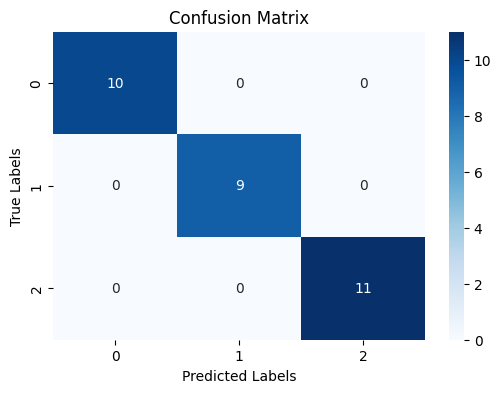

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Jika kamu tahu nama kelas (opsional, agar lebih informatif)
# misalnya: class_names = ['Negatif', 'Positif']
# maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

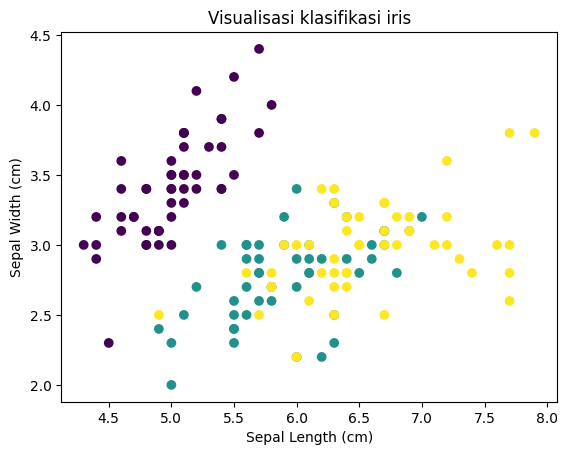

In [13]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualisasi klasifikasi iris')
plt.show()

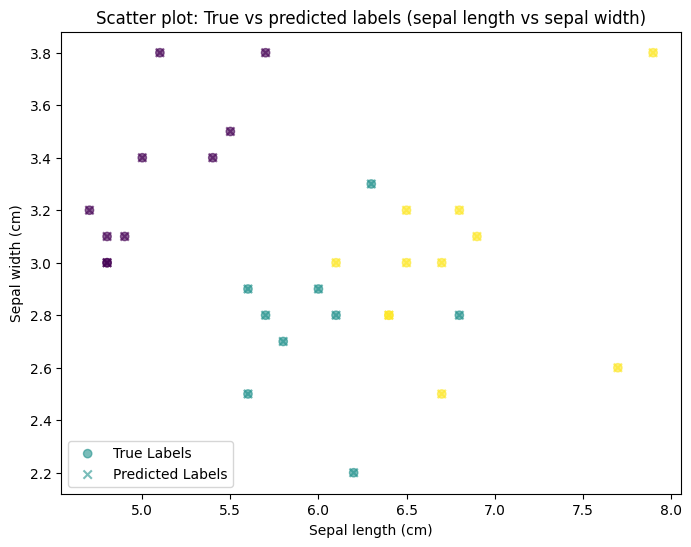

In [14]:
from sklearn.preprocessing import LabelEncoder

# re-encoder y_test for plotting
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(8, 6))

# plot titik berdasarkan label asli
plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'],
           c=y_test_encoded, cmap='viridis', marker='o', label='True Labels', alpha=0.6
           )

# plot titik berdasarkan label hasil prediksi
plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'],
           c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Labels', alpha=0.6
           )

plt.title("Scatter plot: True vs predicted labels (sepal length vs sepal width)")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.legend()
plt.show()

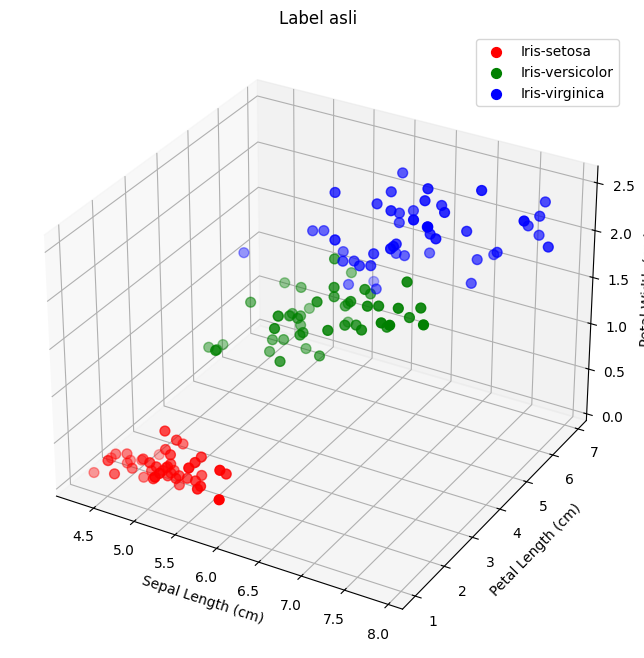

<Figure size 640x480 with 0 Axes>

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

#3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

#8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(121, projection='3d')

#Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

#Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax1.scatter(
        subset['SepalLengthCm'], 
        subset['PetalLengthCm'], 
        subset['PetalWidthCm'],
        color=colors[i],
        label=species,
        s = 50
    )

ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_zlabel('Petal Width (cm)')
ax1.set_title('Label asli')
ax1.legend()
plt.show()

# plot 2: label prediksi
ax2 = fig.add_subplot(122, projection='3d')
# tambahkan hasil prediksi ke dataframe
# create a new column and initialize with none
df['Predicted'] = None
# assign predicted values to the rows that were in the test set
df.loc[X_test.index, 'Predicted'] = y_pred

# visualisasi 3d berdasarkan hasil prediksi
# warna untuk tiap kelas hasil prediksi
# make sure to use the encoded predicted labels for coloring
# you might need to encode the 'Predicted' column if it's still in string format
if df['Predicted'].dtype == 'object':
    # only encode the non-Non values
    predicted_encoded = le.transform(df.loc[X_test.index, 'Predicted'])
    df.loc[X_test.index, 'PredictedEncoded'] = predicted_encoded
    plot_column = 'PredictedEncoded'
else:
    plot_column = 'Predicted'

# plot tiap spesies dengan warna berbeda based on predicted label
# use the original df and filter by the encoded predicted labels
for i, species_label in enumerate(labels):
    # filter using the encoded predicted column and original index from X_test
    subset = df.loc[X_test.index].dropna(subset=[plot_column])
    subset = subset[subset[plot_column] == i]

    ax2.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['SepalWidthCm'],
        color=colors[i],
        label=f"Predicted: {species_label}",
        s=50,
        alpha=0.7
    )

ax2.set_xlabel('Sepal Length (cm)')
ax2.set_ylabel('Petal Length (cm)')
ax2.set_zlabel('Petal Width (cm)')
ax2.set_title('Label prediksi (Test set)')
ax2.legend()

plt.suptitle('Perbandingan label asli vs hasil prediksi', fontsize=14)
plt.show()